## CIND820 Project Course Code
### Ryan Boyd

#### Libraries imported

In [1]:
import laspy as lp, sklearn as skl, numpy as np, matplotlib as mp, pandas as pd

In [2]:
from sklearn import cluster

In [3]:
from sklearn import preprocessing as prep

In [4]:
import matplotlib.pyplot as plt

#### Data loaded and prepared

In [5]:
path_to_data = "F:/Data/Lidar/dtvan/dtvan.laz"
with lp.open(path_to_data) as las_file:
    las_data = las_file.read()

In [6]:
las_data.header.point_count

20975490

#### The full original dataset is too large to work with so it is clipped to a smaller study area which was arbitratily selected. The dataframe is queried by the study area longitude and latitude boundary. The pre-classified ground points are removed (since we are not concerned with ground right now), which is class 2, class 1 is the unclassified points and we only want to work with these.

In [7]:
path_to_data = "F:/Data/Lidar/dtvan/dtvan.laz"
with lp.open(path_to_data) as las_file:
    las_data = las_file.read()

In [8]:
las_data.header.point_count

20975490

In [9]:
df = pd.DataFrame({"X":list(las_data.x),"Y":list(las_data.y),"Z":list(las_data.z),"Intensity":las_data.intensity,"return_num":las_data.return_number,"totalreturns":las_data.num_returns,"classification":las_data.classification})

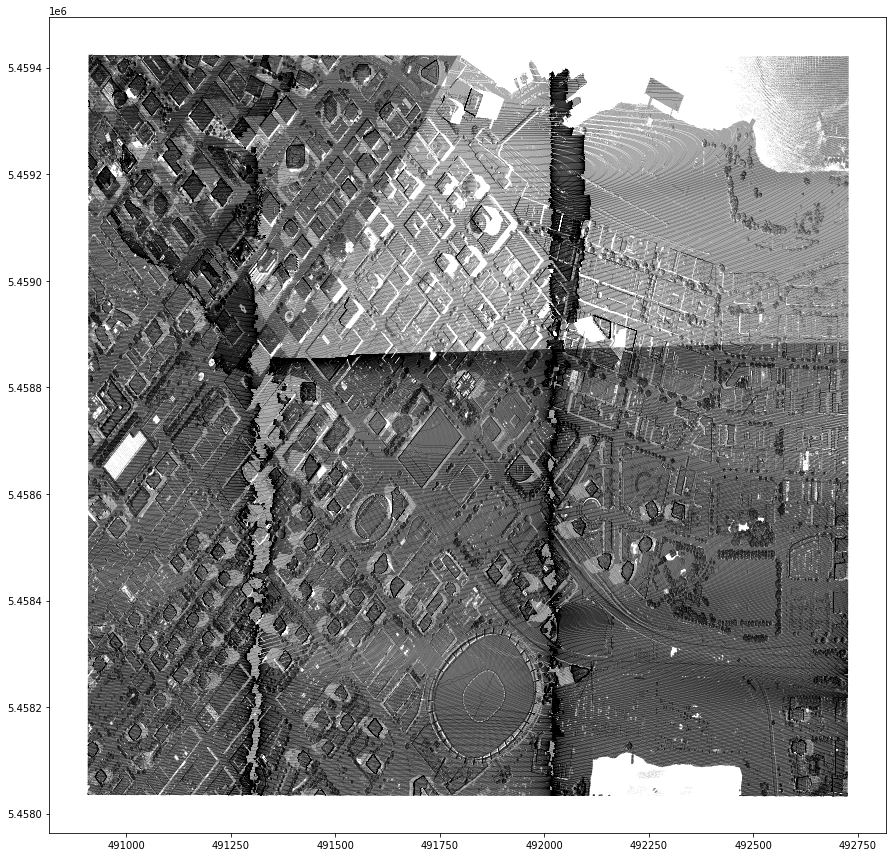

In [10]:
fig,ax = plt.subplots(figsize = (15,15))
ax.scatter(df['X'],df['Y'],zorder=1,alpha=0.25,c='black',s=0.001)

In [11]:
#aoi_extent = {'xmax':492414.34,'xmin':491667.05,'ymax':5458812.22,'ymin':5458064.93}
aoi_extent = {'xmax':492414.34,'xmin':492000,'ymax':5458812.22,'ymin':5458500}

In [12]:
df_clip = df.query("X>{0}&X<{1}&Y>{2}&Y<{3}&classification==1".format(aoi_extent['xmin'],aoi_extent['xmax'],aoi_extent['ymin'],aoi_extent['ymax']))

In [13]:
df_clip

X           Y      Z  Intensity  return_num  totalreturns  \
4191844   492000.07  5458599.16  18.02        110           1             1   
4191845   492000.23  5458599.17  18.08         99           1             1   
4191846   492000.34  5458599.18  18.19         78           1             1   
4191847   492000.43  5458599.19  18.43         82           1             1   
4191848   492000.55  5458599.20  18.50        109           1             1   
...             ...         ...    ...        ...         ...           ...   
20827382  492412.35  5458600.03   4.75         31           2             2   
20827383  492413.33  5458600.28   8.01         56           1             2   
20827384  492412.65  5458600.04   4.71         36           2             2   
20827385  492413.76  5458600.35   8.72         81           1             1   
20827386  492414.07  5458600.36   8.76        147           1             1   

          classification  
4191844                1  
4191845                1  
4191846                1  
4191847                1  
4191848                1  
...                  ...  
20827382               1  
20827383               1  
20827384               1  
20827385               1  
20827386               1  

[1140124 rows x 7 columns]

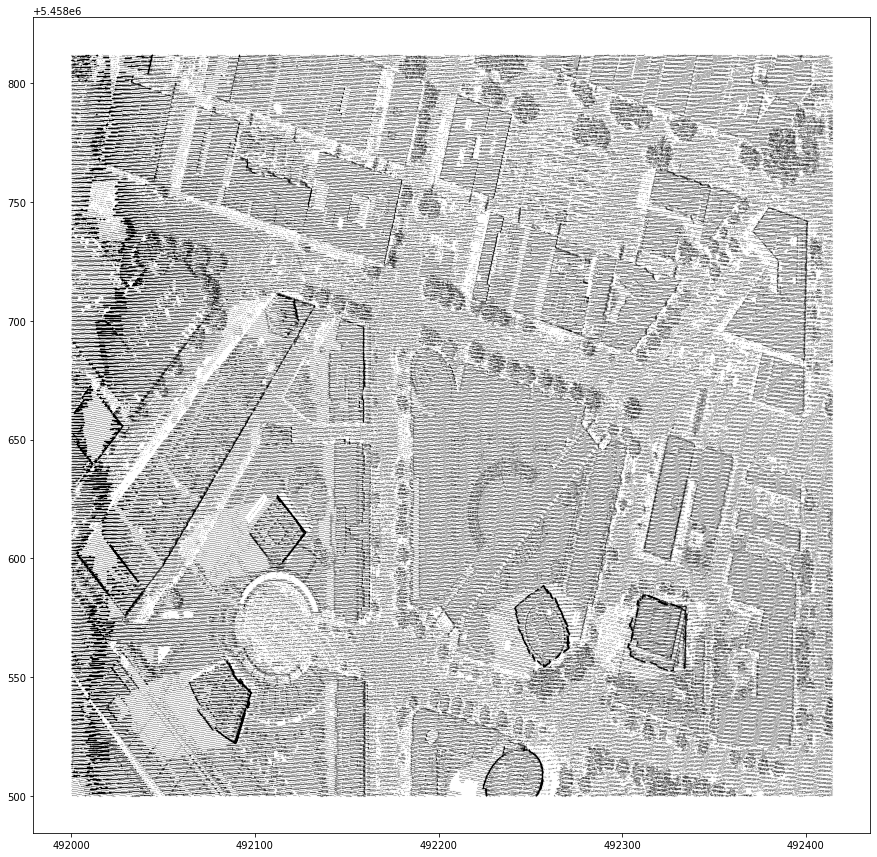

In [14]:
fig,ax = plt.subplots(figsize = (15,15))
ax.scatter(df_clip['X'],df_clip['Y'],zorder=1,alpha=0.5,c='black',s=0.01)

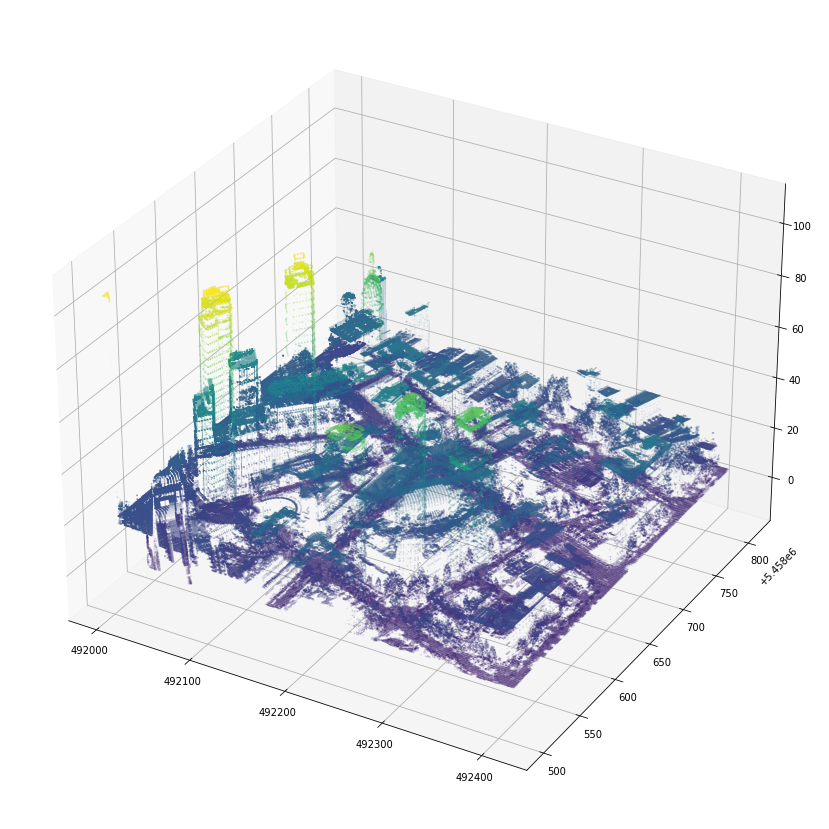

In [15]:
fig,ax = plt.subplots(figsize = (15,15)),plt.axes(projection='3d')
ax.scatter3D(df_clip['X'],df_clip['Y'],df_clip['Z'],c=df_clip['Z'],s=0.01,alpha=0.5)

#### Data normalized and preprocessed for analysis

In [16]:
x_normal = (df_clip['X'] - min(df_clip['X']))/(max(df_clip['X']-min(df_clip['X'])))*100

In [17]:
y_normal = (df_clip['Y'] - min(df_clip['Y']))/(max(df_clip['Y']-min(df_clip['Y'])))*100

In [18]:
z_normal = (df_clip['Z'] - min(df_clip['Z']))/(max(df_clip['Z']-min(df_clip['Z'])))*100

In [19]:
i_normal = (df_clip['Intensity'] - min(df_clip['Intensity']))/(max(df_clip['Intensity']-min(df_clip['Intensity'])))*100

In [20]:
df_normal = pd.DataFrame({'X':x_normal,'Y':y_normal,'Z':z_normal,'I':i_normal,'return_num':df_clip['return_num'],'total_returns':df_clip['totalreturns']})

In [21]:
df_normal

X          Y          Z         I  return_num  total_returns
4191844    0.014482  31.758488  23.541595  2.682747           1              1
4191845    0.053099  31.761691  23.593372  2.412011           1              1
4191846    0.079649  31.764894  23.688298  1.895151           1              1
4191847    0.101371  31.768097  23.895409  1.993601           1              1
4191848    0.130334  31.771300  23.955816  2.658134           1              1
...             ...        ...        ...       ...         ...            ...
20827382  99.522109  32.037156  12.090093  0.738371           2              2
20827383  99.758641  32.117233  14.903348  1.353680           1              2
20827384  99.594516  32.040359  12.055575  0.861432           2              2
20827385  99.862425  32.139654  15.516051  1.968988           1              1
20827386  99.937247  32.142857  15.550570  3.593404           1              1

[1140124 rows x 6 columns]

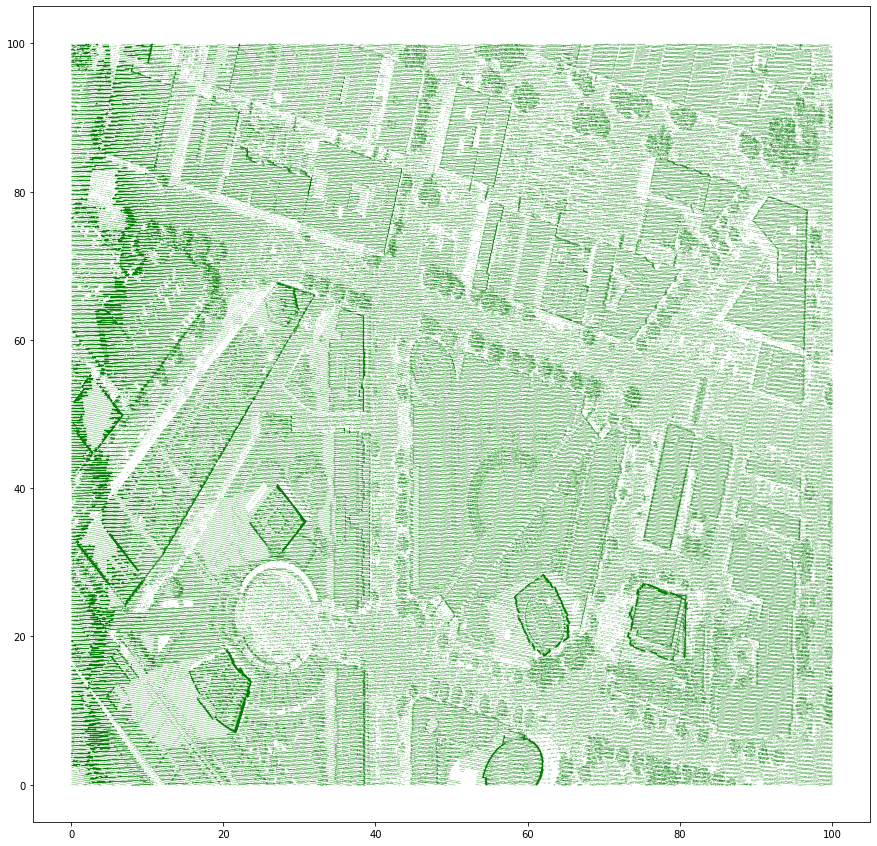

In [22]:
fig,ax = plt.subplots(figsize = (15,15))
ax.scatter(df_normal['X'],df_normal['Y'],c='g',s=0.01,alpha=0.5)

#### Some data stats

#### Testing

In [23]:
# why are normalized intensity values so small
len([intensity for intensity in df_clip['Intensity'] if intensity > 300])

9410

In [24]:
df_normal

X          Y          Z         I  return_num  total_returns
4191844    0.014482  31.758488  23.541595  2.682747           1              1
4191845    0.053099  31.761691  23.593372  2.412011           1              1
4191846    0.079649  31.764894  23.688298  1.895151           1              1
4191847    0.101371  31.768097  23.895409  1.993601           1              1
4191848    0.130334  31.771300  23.955816  2.658134           1              1
...             ...        ...        ...       ...         ...            ...
20827382  99.522109  32.037156  12.090093  0.738371           2              2
20827383  99.758641  32.117233  14.903348  1.353680           1              2
20827384  99.594516  32.040359  12.055575  0.861432           2              2
20827385  99.862425  32.139654  15.516051  1.968988           1              1
20827386  99.937247  32.142857  15.550570  3.593404           1              1

[1140124 rows x 6 columns]

In [25]:
newdf = pd.DataFrame({'Z':df_normal['Z'],"I":df_normal['I'],'rcount':df_normal['total_returns']})

In [26]:
newdf

Z         I  rcount
4191844   23.541595  2.682747       1
4191845   23.593372  2.412011       1
4191846   23.688298  1.895151       1
4191847   23.895409  1.993601       1
4191848   23.955816  2.658134       1
...             ...       ...     ...
20827382  12.090093  0.738371       2
20827383  14.903348  1.353680       2
20827384  12.055575  0.861432       2
20827385  15.516051  1.968988       1
20827386  15.550570  3.593404       1

[1140124 rows x 3 columns]

In [27]:
X1 = np.array(newdf)

In [28]:
X1

array([[23.54159475,  2.68274674,  1.        ],
       [23.59337245,  2.41201083,  1.        ],
       [23.68829824,  1.89515137,  1.        ],
       ...,
       [12.05557473,  0.86143244,  2.        ],
       [15.51605109,  1.96898843,  1.        ],
       [15.55056955,  3.59340389,  1.        ]])

#### Initial Classification

In [29]:
kmeancluster = cluster.KMeans(5,init='random',n_init=10)

In [30]:
k_clusters = kmeancluster.fit(X1)

In [31]:
len(k_clusters.labels_)

1140124

In [32]:
df_normal['k_cluster'] = k_clusters.labels_

In [33]:
df_normal

X          Y          Z         I  return_num  \
4191844    0.014482  31.758488  23.541595  2.682747           1   
4191845    0.053099  31.761691  23.593372  2.412011           1   
4191846    0.079649  31.764894  23.688298  1.895151           1   
4191847    0.101371  31.768097  23.895409  1.993601           1   
4191848    0.130334  31.771300  23.955816  2.658134           1   
...             ...        ...        ...       ...         ...   
20827382  99.522109  32.037156  12.090093  0.738371           2   
20827383  99.758641  32.117233  14.903348  1.353680           1   
20827384  99.594516  32.040359  12.055575  0.861432           2   
20827385  99.862425  32.139654  15.516051  1.968988           1   
20827386  99.937247  32.142857  15.550570  3.593404           1   

          total_returns  k_cluster  
4191844               1          4  
4191845               1          4  
4191846               1          4  
4191847               1          4  
4191848               1          4  
...                 ...        ...  
20827382              2          1  
20827383              2          1  
20827384              2          1  
20827385              1          1  
20827386              1          1  

[1140124 rows x 7 columns]

#### Visualization

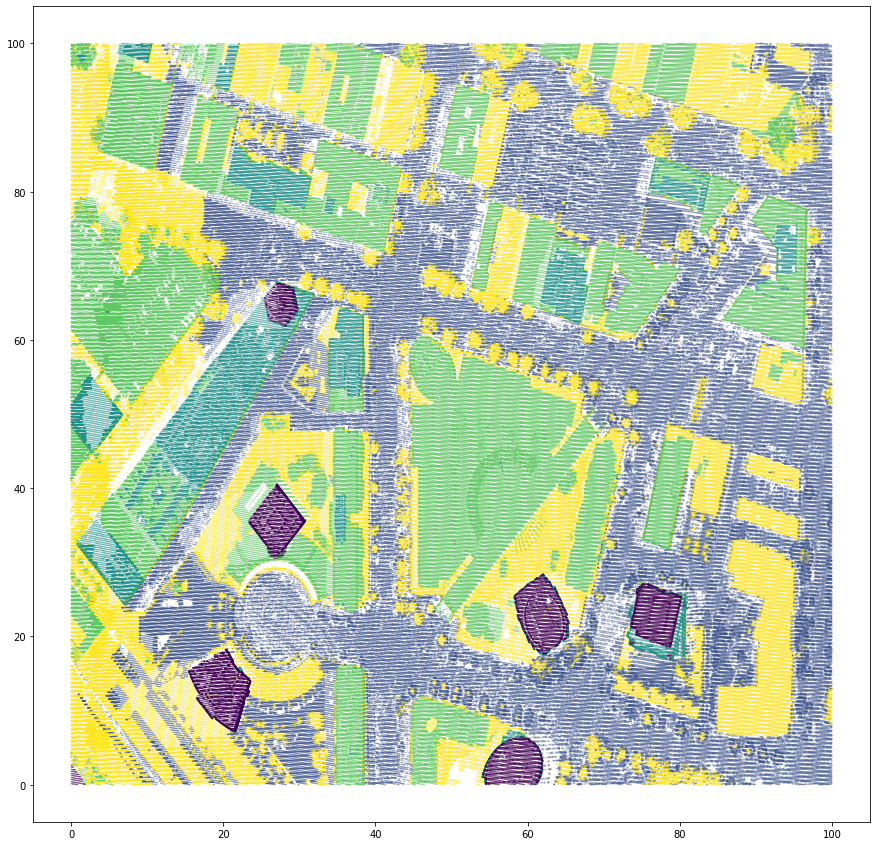

In [34]:
fig,ax = plt.subplots(figsize = (15,15))
ax.scatter(df_normal['X'],df_normal['Y'],c=df_normal['k_cluster'],s=0.1,alpha=0.5)

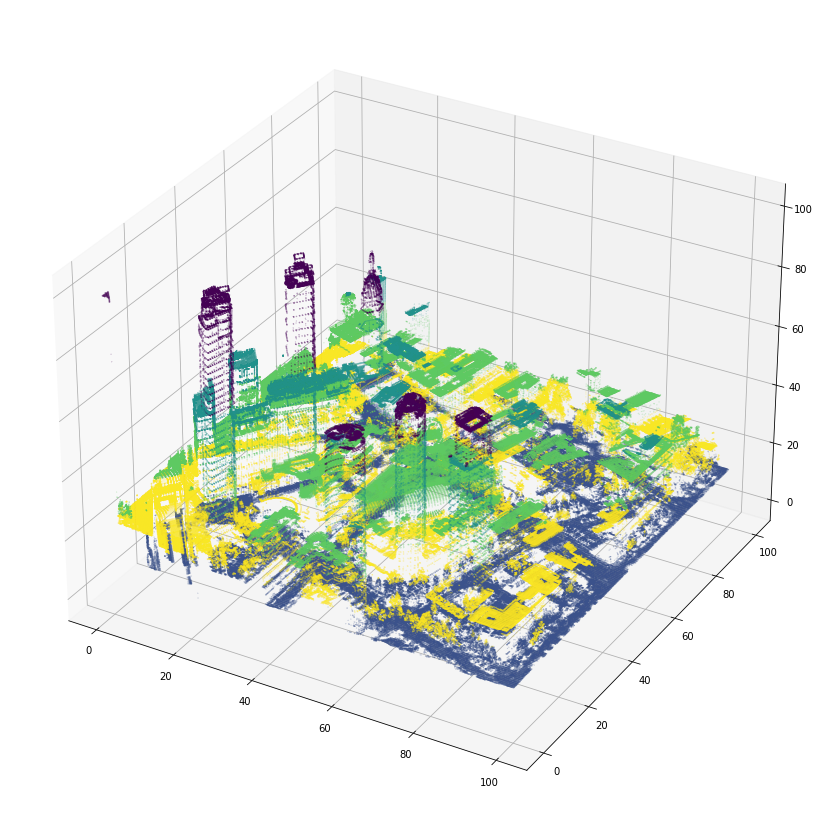

In [35]:
fig,ax = plt.subplots(figsize = (15,15)),plt.axes(projection='3d')
ax.scatter3D(df_normal['X'],df_normal['Y'],df_normal['Z'],c=df_normal['k_cluster'],s=0.01,alpha=1)

#### Initial Distance Clustering

In [36]:
df = pd.DataFrame({"X":df_normal['X'],"Y":df_normal['Y'],"k_cluster":df_normal['k_cluster']})

In [37]:
X2 = np.array(df)

In [38]:
X2

array([[1.44815601e-02, 3.17584881e+01, 4.00000000e+00],
       [5.30990539e-02, 3.17616912e+01, 4.00000000e+00],
       [7.96485808e-02, 3.17648943e+01, 4.00000000e+00],
       ...,
       [9.95945163e+01, 3.20403587e+01, 1.00000000e+00],
       [9.98624252e+01, 3.21396541e+01, 1.00000000e+00],
       [9.99372466e+01, 3.21428571e+01, 1.00000000e+00]])

In [51]:
dbscan = cluster.DBSCAN(eps=3,min_samples=20,leaf_size=25)

In [52]:
db_clusters = dbscan.fit(X2)

MemoryError: 

In [ ]:
len(set(db_clusters.labels_))

In [ ]:
db_clusters.labels_

In [ ]:
df_normal['db_cluster'] = db_clusters.labels_

In [ ]:
df_normal

In [ ]:
fig,ax = plt.subplots(figsize = (15,15))
ax.scatter(df_normal['X'],df_normal['Y'],c=df_normal['db_cluster'],s=0.1,alpha=0.5)

In [ ]:
fig,ax = plt.subplots(figsize = (15,15)),plt.axes(projection='3d')
ax.scatter3D(df_normal['X'],df_normal['Y'],df_normal['Z'],c=df_normal['db_cluster'],s=0.01,alpha=1)

#### Analysis of results

#### Updates